**Author:** Jim Maddock  
**Created:** 8-9-22  
**Description:** Descriptive stats for the Momentum datasets.  Includes dataframes for RQ 1 (the relationship between readership and new editors) and RQ 2 (the relationship between active editors and content creation).  For a methods overview see [this document](https://docs.google.com/document/d/1FoAv1xFfmtMPX7PC33XZBSYaZGM0Lf5RBaGpFSCkRVk/edit?usp=sharing)

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [78]:
## load the dataset and remove the final month since August 2022 is not complete
FILEPATH = '/home/jmads/datasets/momentum/active_editors_content_added_8-7-22.csv'

editors_content_df = pd.read_csv(FILEPATH)
editors_content_df = editors_content_df.loc[editors_content_df['wiki_age'] != editors_content_df['wiki_age'].max()]

In [68]:
editors_content_df

,month,year,num_active_editors,num_bytes_added,num_articles,wiki_age
0,1,2001,59,299346,1,1
1,2,2001,44,967157,8,2
2,3,2001,77,1496613,49,3
3,4,2001,44,1131944,75,4
4,5,2001,59,1549490,113,5
...,...,...,...,...,...,...
254,3,2022,120583,949003341,33646356,255
255,4,2022,115588,899874587,33740626,256
256,5,2022,114828,961060521,33853815,257
257,6,2022,109301,868234041,33957286,258


# RQ 2 (Editors -> Content) Descriptive Stats

In [93]:
editors_content_df[['num_active_editors','num_bytes_added','num_articles','wiki_age']].describe()

,num_active_editors,num_bytes_added,num_articles,wiki_age,month
count,259.000000,2.590000e+02,2.590000e+02,259.000000,259.000000
mean,99345.899614,1.300497e+09,1.285858e+07,130.000000,6.432432
std,52817.901535,1.134830e+09,1.141891e+07,74.911058,3.451529
min,44.000000,2.993460e+05,1.000000e+00,1.000000,1.000000
25%,104824.000000,8.097496e+08,9.279430e+05,65.500000,3.000000
50%,118203.000000,9.156066e+08,1.018148e+07,130.000000,6.000000
75%,128697.000000,1.640348e+09,2.284773e+07,194.500000,9.000000
max,190449.000000,6.033403e+09,3.407418e+07,259.000000,12.000000


The correlation table below shows correlations of below .6 between our independent variable (number of active editors) and our controls.  However, the high correlation of .9 between the number of articles and wiki age indicates that we should drop one due to coliniarity concerns.

In [94]:
editors_content_df[['num_bytes_added','num_active_editors','num_articles','wiki_age','month']].corr()

,num_bytes_added,num_active_editors,num_articles,wiki_age,month
num_bytes_added,1.000000,0.684303,-0.217352,-0.077771,-0.025430
num_active_editors,0.684303,1.000000,0.453833,0.593181,-0.021126
num_articles,-0.217352,0.453833,1.000000,0.980051,0.003950
wiki_age,-0.077771,0.593181,0.980051,1.000000,0.012382
month,-0.025430,-0.021126,0.003950,0.012382,1.000000


The 3 histograms below show two interesting properties.  First, each of the three variables show heavy weighting towards the left side of the figure, indicating that for a large number of months, each of the three variables had relatively low values.  This is likely due to the long tail on the lefthand side of all three time series graphs, which show that for the first years of English Wikipedia's existance, number of active editors, number of bytes added, and total number of articles were all relatively low.

Second, ignoring the large spike at the far left, number of active editors is relatively normally distributed, the number of bytes added is skewed left, and the total number of articles is relatively evenly distributed.

Text(0.5, 1.0, 'num_articles')

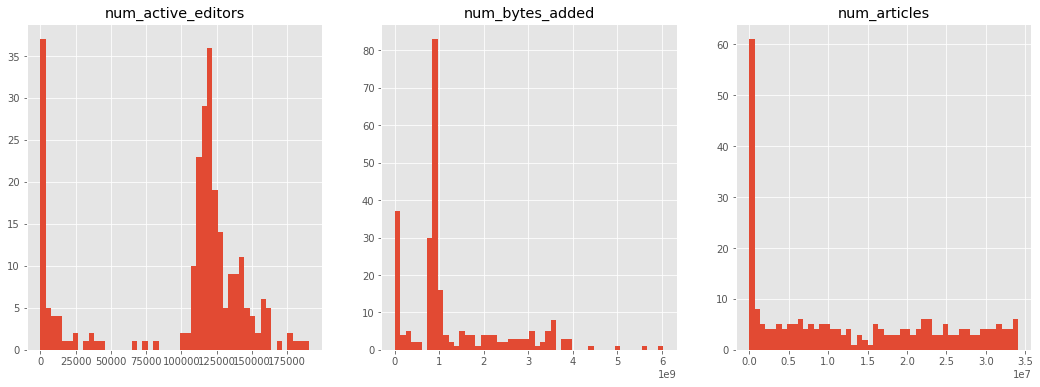

In [86]:
BINS = 50

fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].hist(editors_content_df['num_active_editors'],bins=BINS)
axs[0].set_title('num_active_editors')
axs[1].hist(editors_content_df['num_bytes_added'],bins=BINS)
axs[1].set_title('num_bytes_added')
axs[2].hist(editors_content_df['num_articles'],bins=BINS)
axs[2].set_title('num_articles')

The following time series graphs illustrate that the spike on the left hand side of each histogram is likely due to the early years of English Wikipedia.  Article growth appears to be relatively linear after the first 50 months, whereas the total number of bytes added and the number of active editors both spike around month 75, returning afterward to moderate levels.

Text(0.5, 1.0, 'num_articles')

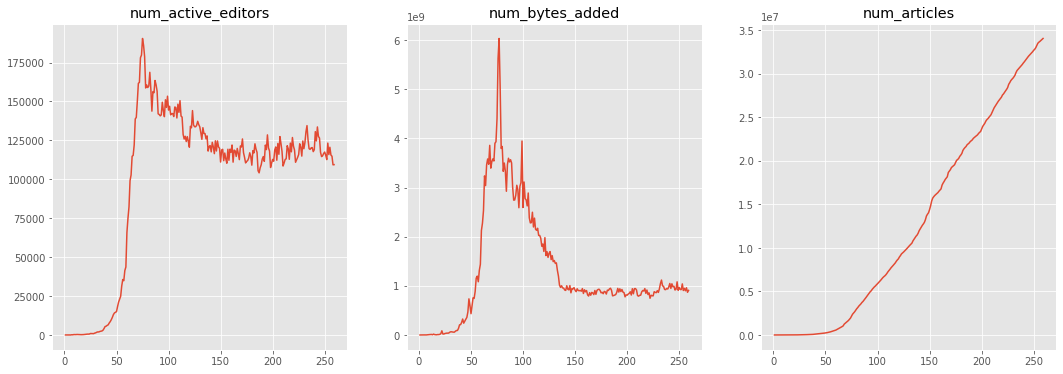

In [72]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].plot(editors_content_df['wiki_age'], editors_content_df['num_active_editors'])
axs[0].set_title('num_active_editors')
axs[1].plot(editors_content_df['wiki_age'], editors_content_df['num_bytes_added'])
axs[1].set_title('num_bytes_added')
axs[2].plot(editors_content_df['wiki_age'], editors_content_df['num_articles'])
axs[2].set_title('num_articles')

In [73]:
FILEPATH = '/home/jmads/datasets/momentum/pageview_new_accounts_8-7-22.csv'

pageview_accounts_df = pd.read_csv(FILEPATH)
pageview_accounts_df = pageview_accounts_df.loc[pageview_accounts_df['wiki_age'] != pageview_accounts_df['wiki_age'].max()]

# RQ 1 (Readers -> Editors) Descriptive Stats

In [74]:
pageview_accounts_df[['num_pageviews','num_new_accounts','num_articles','wiki_age']].describe()

,num_pageviews,num_new_accounts,num_articles,wiki_age
count,8.700000e+01,87.000000,8.700000e+01,87.000000
mean,6.249831e+09,59642.229885,2.685619e+07,48.000000
std,3.576330e+08,8180.213053,4.428382e+06,25.258662
min,5.610781e+09,39366.000000,1.946427e+07,5.000000
25%,6.009758e+09,55021.500000,2.284773e+07,26.500000
50%,6.206376e+09,60307.000000,2.685637e+07,48.000000
75%,6.406744e+09,65548.000000,3.086704e+07,69.500000
max,7.710673e+09,78009.000000,3.407418e+07,91.000000


The following correlation table shows a similar pattern to the RQ 2 dataset.  Our two controls (wiki age and number of articles) are highly correlated, but neither variable is highly correlated with number of pageviews (our independent variable).  As with the RQ 2 dataset, this correlation indicates that we should drop either number of articles or wiki age from our model.

In [95]:
pageview_accounts_df[['num_new_accounts','num_pageviews','num_articles','wiki_age','month']].corr()

,num_new_accounts,num_pageviews,num_articles,wiki_age,month
num_new_accounts,1.000000,0.334492,-0.748679,-0.749564,-0.241778
num_pageviews,0.334492,1.000000,0.148709,0.134625,-0.302813
num_articles,-0.748679,0.148709,1.000000,0.998919,-0.053336
wiki_age,-0.749564,0.134625,0.998919,1.000000,-0.054440
month,-0.241778,-0.302813,-0.053336,-0.054440,1.000000


The following 3 histographs show that number of pageviews and number of new accounts are relatively normally distributed, while number of articles is relatively evenly distributed.  Number of page views is somewhat skewed left.

Text(0.5, 1.0, 'num_articles')

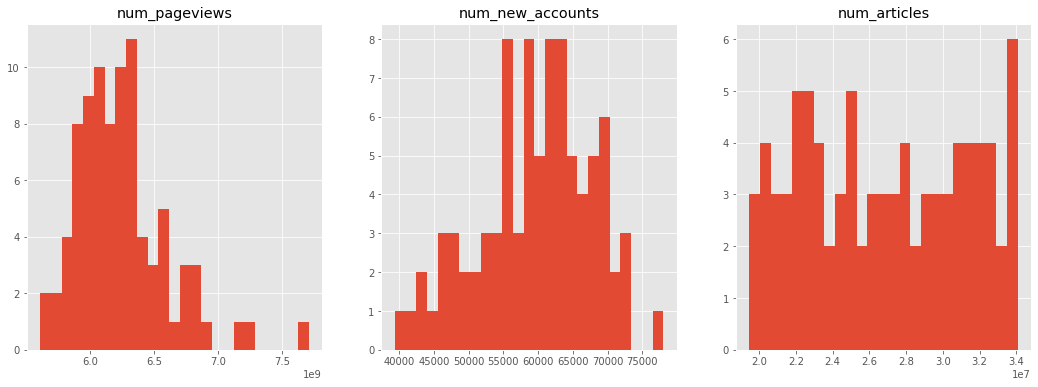

In [90]:
BINS = 25

fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].hist(pageview_accounts_df['num_pageviews'],bins=BINS)
axs[0].set_title('num_pageviews')
axs[1].hist(pageview_accounts_df['num_new_accounts'],bins=BINS)
axs[1].set_title('num_new_accounts')
axs[2].hist(pageview_accounts_df['num_articles'],bins=BINS)
axs[2].set_title('num_articles')

The three time series plots show a possible periodic yearly trend in new accounts and the number of pageviews, though it's unclear whether this pattern holds without further analysis.  Total number of articles seems to increase linearly with time.

Text(0.5, 1.0, 'num_articles')

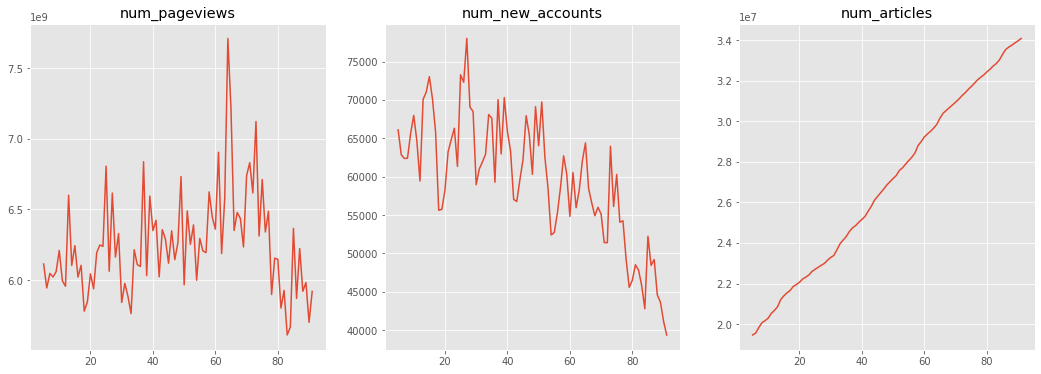

In [77]:
fig, axs = plt.subplots(1,3, figsize=(18, 6))
axs[0].plot(pageview_accounts_df['wiki_age'],pageview_accounts_df['num_pageviews'])
axs[0].set_title('num_pageviews')
axs[1].plot(pageview_accounts_df['wiki_age'],pageview_accounts_df['num_new_accounts'])
axs[1].set_title('num_new_accounts')
axs[2].plot(pageview_accounts_df['wiki_age'],pageview_accounts_df['num_articles'])
axs[2].set_title('num_articles')